# Loading Packages / Read Data

In [1]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv')
train_original = train.copy()

# Exploratory Data Analysis

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()
# 13 variables in total include the target variable 
# seeing some missing values (that needed to be handled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# drop irrelevant columns 
train = train.drop(columns = ['Loan_ID'])
train.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
 train.shape

(614, 12)

## Univatiate Analysis (Independent Variables)

#### Target Variable

In [8]:
# 'Loan_Status'
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# percentage distribution
train['Loan_Status'].value_counts(normalize = True)
# The loan of 422 (around 69%) people out of 614 was approved

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

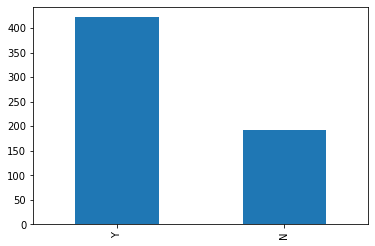

In [10]:
# bar plot
train['Loan_Status'].value_counts().plot.bar()

#### Independent Variable(Categorical)

In [11]:
# inform applicants information

In [12]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

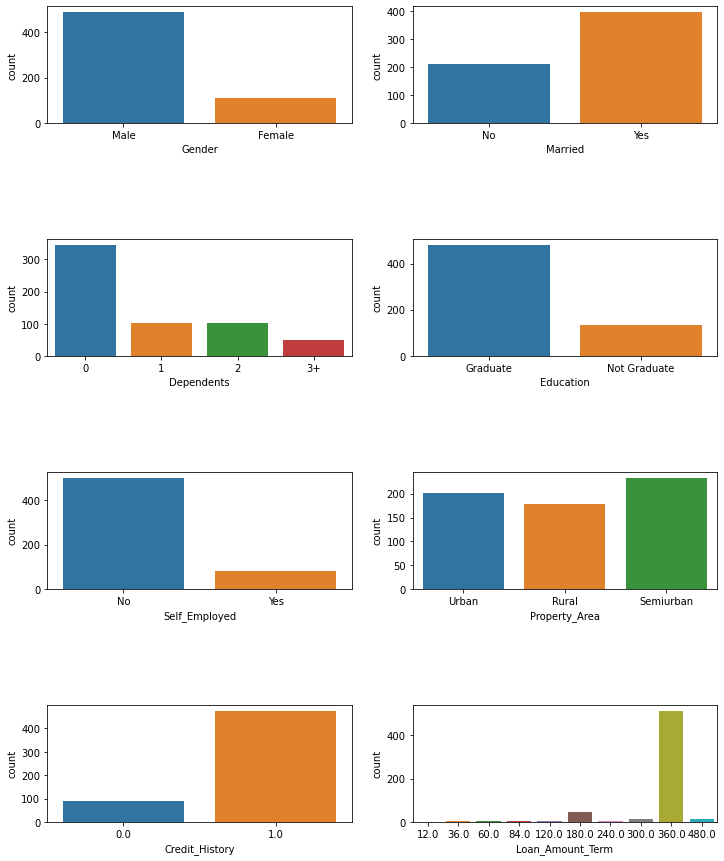

In [13]:
# plot categoracal variables - count numbers
fig, axes = plt.subplots(4, 2, figsize = (12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx//2, idx%2
    sns.countplot(x=cat_col, data=train, ax=axes[row,col])

plt.subplots_adjust(hspace=1)

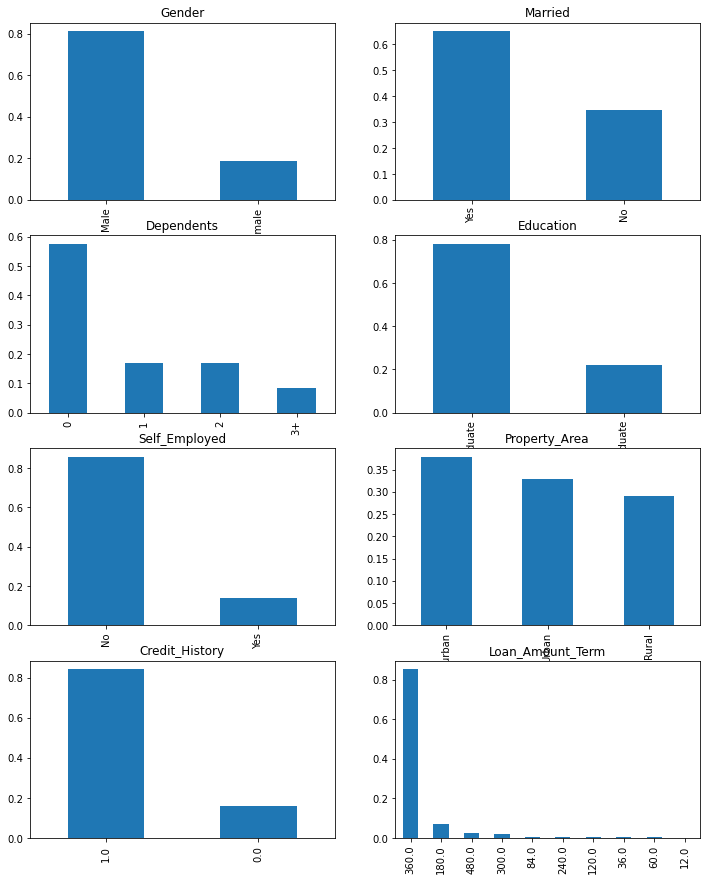

In [14]:
# plot categoracal variables - percentage distriburions
fig, axes = plt.subplots(4, 2, figsize = (12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx//2, idx%2
    train[cat_col].value_counts(normalize=True).plot.bar(ax=axes[row,col], title = cat_col)

#### Independent Variable(Numerical)

In [15]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

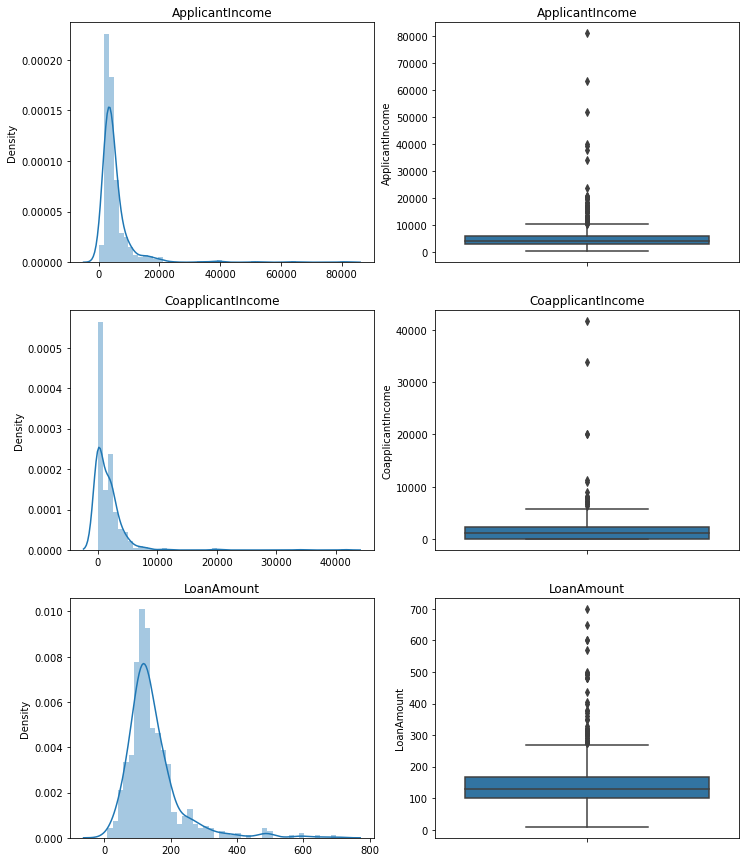

In [16]:
# plot numerical variables
# distribution plots and boxplots
fig, axes = plt.subplots(3, 2, figsize = (12, 15))

for idx, cat_col in enumerate(numerical_columns):
    row, col = idx, 0
    sns.distplot(x=train[cat_col], ax=axes[row, col]).set_title(cat_col)
    sns.boxplot(y=cat_col, data=train, ax=axes[row, col+1]).set_title(cat_col)


In [17]:
# Distribution plots: toward to the left, right-skewed -> not normarlly distributed
# Boxplot: exists outliers

## Bivariate Analysis (Independent Variable vs Target Variable)

#### Independent Variable(Categorical)

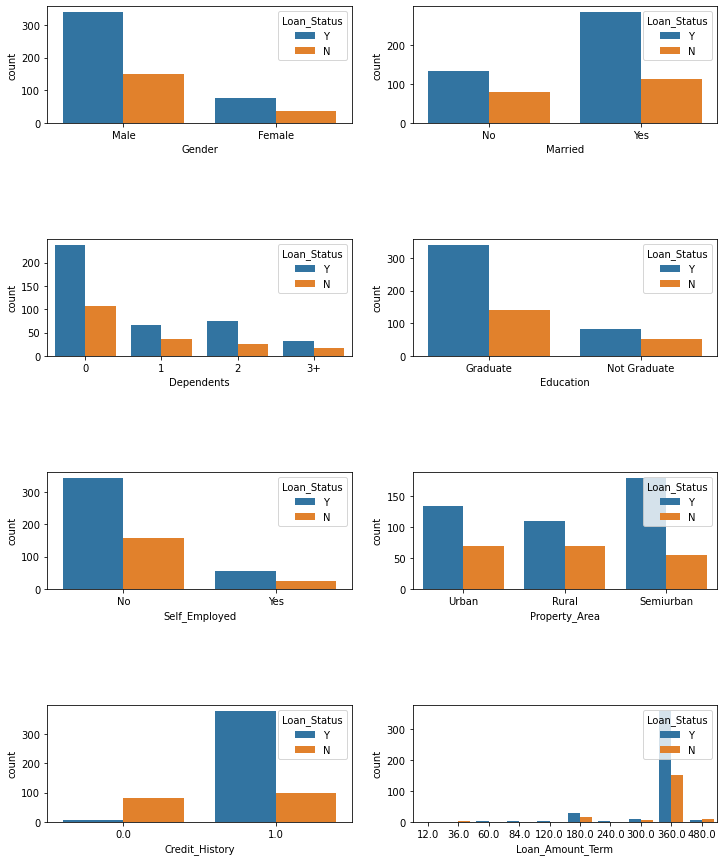

In [18]:
# plot categoracal variables - count numbers
fig, axes = plt.subplots(4, 2, figsize = (12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx//2, idx%2
    sns.countplot(x=cat_col, data=train, hue='Loan_Status', ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [19]:
# check the 'Bivariate Analysis' from Analytics Vidhya, website: https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119456-bivariate-analysis

## Handling Missing Values

In [20]:
# check duplicates
train[train.duplicated()]

# No duplicates

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [21]:
# count the missing values
train.isnull().sum().to_frame('null')

,null
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [22]:
# Categorical Variables: 'Gender', 'Married', 'Dependents', 'Self-Employed', 'Credit_History', Loan_Amount_Term'
# Numerical Variables: 'LoanAmount'

In [23]:
# treat 'Loan_Amount_Term' as categorical variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### Independent Categorical Variable

In [24]:
# fill missing categorical values with mode

categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

for col in categ_cols:
    train[col] = train[col].fillna(train[col].mode()[0])

In [25]:
# create dummy variables for categorical variables excluding 'Loan_Amount_Term'
dummy_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
              'Credit_History', 'Property_Area']
train_dummies = pd.get_dummies(train[dummy_cols], drop_first=True)

#### Independent Numerical Variable

In [26]:
# fill missing numerical values with median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
# data normalizationd
#num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
#train_num = (train[num_cols] - train[num_cols].mean()) / train[num_cols].std()

In [28]:
# find out outliers
#out_container = pd.DataFrame()
#for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
#    q1 = train_num[col].quantile(0.25)
#    q3 = train_num[col].quantile(0.75)
#    iqr = q3 - q1
#    out = train_num[(train_num[col]<(q1-1.5*iqr)) | (train_num[col]>(q3+1.5*iqr))]
#    out_container = pd.concat([out_container, out]).drop_duplicates()

#out_container.head()

In [29]:
# find out outliers
out_container = pd.DataFrame()
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    out = train[(train[col]<(q1-1.5*iqr)) | (train[col]>(q3+1.5*iqr))]
    out_container = pd.concat([out_container, out]).drop_duplicates()

out_container.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,Male,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y


In [30]:
out_container.shape
# Total 79/614 outliers in total (13%)

(79, 12)

In [31]:
# log transformation to tackle right skewed
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train_num = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmount_log', 'Loan_Amount_Term']]

## Pre-Cleaned Dataset

#### Set Loan Status

In [32]:
loan_status = train.Loan_Status.apply(lambda x: 0 if x == 'N' else 1)

In [33]:
df_train = pd.concat([train_num, train_dummies, loan_status], axis =1)
df_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_log,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,4.852030,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [34]:
df_train.shape

(614, 16)

#### Heatmap - Correlation

<AxesSubplot:>

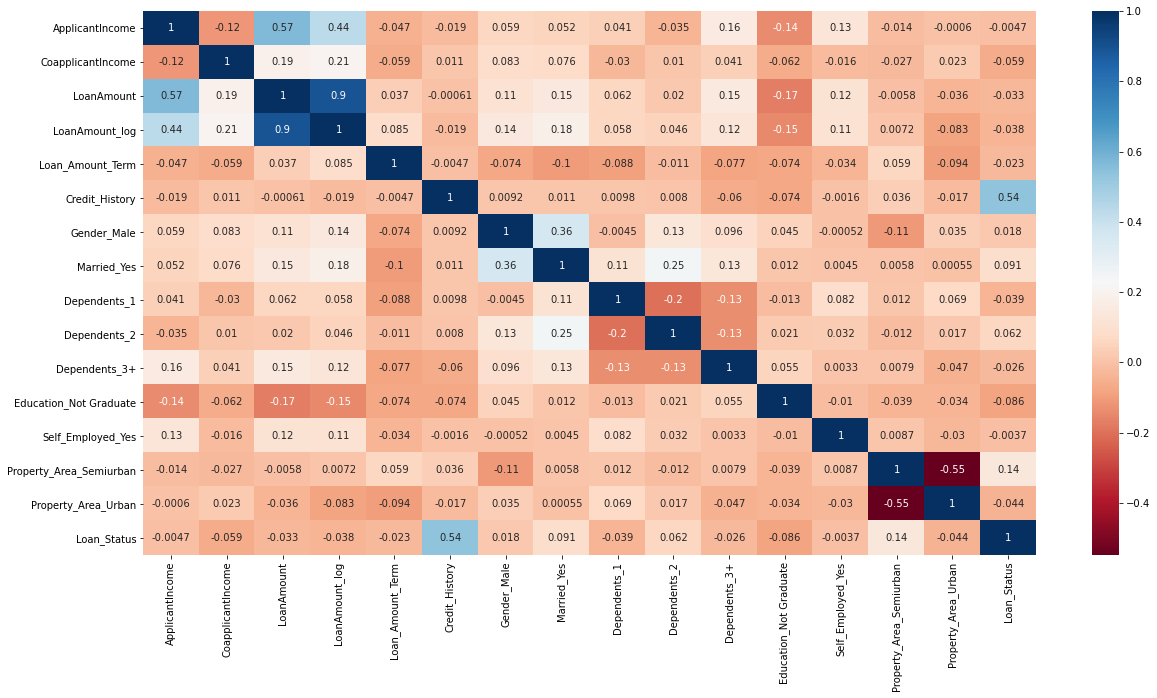

In [35]:
plt.figure(figsize=(20,10))
cor = df_train.corr()
sns.heatmap(cor, cmap='RdBu', annot=True)

In [36]:
# 'ApplicantIncome' and 'LoanAmount' have high colinearity. 
# Also credit history seems to be highly correlated with loan status, this points to it being the most important feature for our model.

## Feature Engineering

#### Based on the domain knowledge, we can compe up with new features that might affect the target variable.

#### Total Income

#### Combine the 'ApplicantIncome' and 'CoapplicantIncome' together as 'TotalIncome'
#### If the total income is high, chances of loan approval might also be high

In [37]:
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_log,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Total_Income
0,5849,0.0,128.0,4.852030,360.0,1.0,1,0,0,0,0,0,0,0,1,1,5849.0
1,4583,1508.0,128.0,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0,0,6091.0
2,3000,0.0,66.0,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1,1,3000.0
3,2583,2358.0,120.0,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1,1,4941.0
4,6000,0.0,141.0,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1,1,6000.0


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

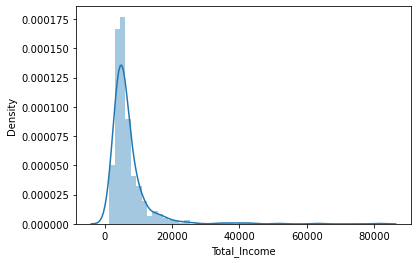

In [38]:
# distribution plot
sns.distplot(df_train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

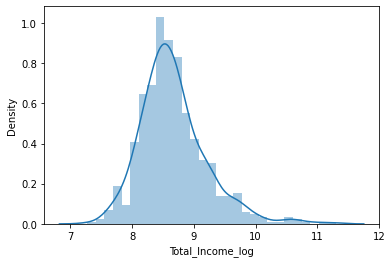

In [39]:
# right skewed
# log transformation
df_train['Total_Income_log'] = np.log(df_train['Total_Income'])
sns.distplot(df_train['Total_Income_log'])

#### EMI

#### EMI is the monthly amount to be paid by the applicant to repay the loan
#### Calculate by taking the ratio of loan amount with respect to loan amount term
#### High EMI might be hard to paid back

In [40]:
df_train['EMI'] = df_train['LoanAmount'] / df_train['Loan_Amount_Term']

## Final Dataset

In [41]:
df_train = df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income'], axis = 1)

In [42]:
df_train.head()

,LoanAmount_log,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Total_Income_log,EMI
0,4.852030,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.674026,0.355556
1,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0,0,8.714568,0.355556
2,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1,1,8.006368,0.183333
3,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1,1,8.505323,0.333333
4,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.699515,0.391667


In [43]:
df_train.shape

(614, 15)

## Train Models

In [44]:
# train-test split
columns = df_train.drop('Loan_Status', axis=1).columns
x_train, x_test, y_train, y_test = train_test_split(df_train[columns], df_train['Loan_Status'], test_size=0.2)

### Logistic Regression

In [45]:
lr_model = LogisticRegression()
# fitting model
lr_model.fit(x_train, y_train)
# model prediction on validation set
lr_pred_cv = lr_model.predict(x_test)
# calculate accuracy
print('Testing Dataset Accuracy: ', accuracy_score(y_test, lr_pred_cv))# the predictions are 80% accurate
print('Testing Dataset F1 score: ', f1_score(y_test, lr_pred_cv))

0.7642276422764228
0.839779005524862


<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

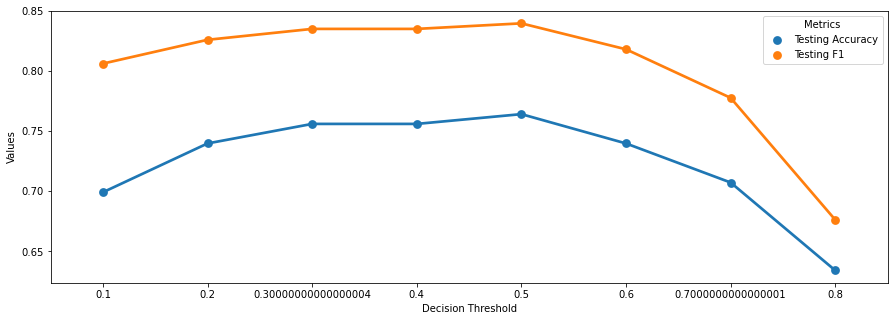

In [73]:
# tune threshold parameter
lr_accuracy = []
lr_f1 = []
thresh_list = []

for thresh in np.arange(0.1,0.9,0.1):
    lr_clf = LogisticRegression(solver='liblinear')
    lr_clf.fit(x_train, y_train)
    
    lr_clf_pred_temp = lr_clf.predict_proba(x_test)[:,1] # only need to get the prob of prediction to be 1
    lr_cld_pred = (lr_clf_pred_temp>thresh).astype(int)
    
    lf_clf_acc = accuracy_score(lr_cld_pred, y_test)
    lr_clf_f1 = f1_score(lr_cld_pred, y_test)
    
    lr_accuracy.append(lf_clf_acc)
    lr_f1.append(lr_clf_f1)
    thresh_list.append(thresh)
    
Tuning_lr = {'Testing Accuracy':lr_accuracy, 'Testing F1':lr_f1, 'Decision Threshold':thresh_list}
Tuning_lr_df = pd.DataFrame.from_dict(Tuning_lr)

# draw accuracy and f1 score plots
plot_df = Tuning_lr_df.melt('Decision Threshold',var_name='Metrics',value_name='Values')

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x='Decision Threshold', y='Values', hue='Metrics', data=plot_df, ax=ax) 

#### We can keep threshold at 0.5 to get optimal accuracy and F-1 score

In [75]:
# set threshold at 0.5 -> initial setting is 0.5
thresh = 0.5
lr_clf_pred_temp = lr_clf.predict_proba(x_test)[:,1] # only need to get the prob of prediction to be 1
lr_cld_pred = (lr_clf_pred_temp > thresh).astype(int)

print('Testing Dataset Accuracy: ', accuracy_score(y_test, lr_cld_pred))# the predictions are 80% accurate
print('Testing Dataset F1 score: ', f1_score(y_test, lr_cld_pred))

print("Confusion Matrix on Test Data")
pd.crosstab(y_test, lr_cld_pred, rownames=['Actual'], colnames=['Predict'], margins=True)

Testing Dataset Accuracy:  0.7642276422764228
Testing Dataset F1 score:  0.839779005524862
Confusion Matrix on Test Data


Predict,0,1,All
Actual,,,
0,18,26,44
1,3,76,79
All,21,102,123


#### The majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

### Decision Tree

In [56]:
# decision tree clasifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
tree_clf_pred = tree_clf.predict(x_train)
tree_clf_score1 = f1_score(tree_clf_pred, y_train)
tree_clf_score2 = accuracy_score(tree_clf_pred, y_train)

# crossvalidation
tree_cv_score1 = cross_val_score(tree_clf, x_train, y_train, cv=4, scoring='f1_macro').mean()
tree_cv_score2 = cross_val_score(tree_clf, x_train, y_train, cv=4, scoring='accuracy').mean()

print('Testing Dataset F1 score: ', tree_clf_score1)
print('Testing Dataset Accuracy: ', tree_clf_score2)
print('Validation F1 score: ', tree_cv_score1)
print('Validation Accuracy: ', tree_cv_score2)

# overfitting problem

Testing Dataset F1 score:  1.0
Testing Dataset Accuracy:  1.0
Validation F1 score:  0.6550379240410422
Validation Accuracy:  0.6864254298280688


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

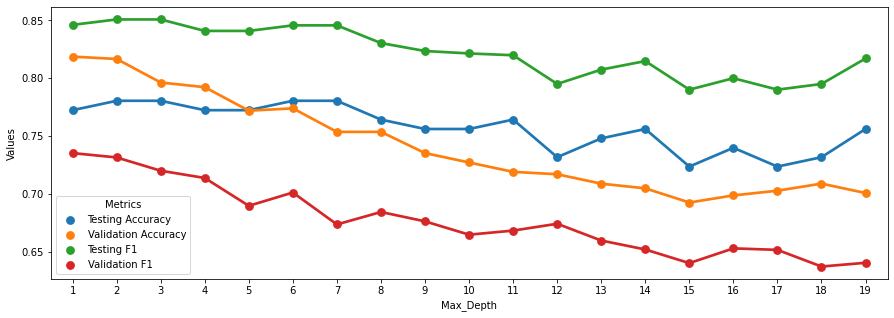

In [57]:
# tuning paraneters
# try to tune 'Max_Depth' of tree
tree_accuracy = []
tree_F1 = []
tree_cv_accuracy = []
tree_cv_F1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x_train, y_train)
    tree_pred = tree_clf.predict(x_test)
    tree_acc = accuracy_score(y_test, tree_pred)
    tree_f1 = f1_score(y_test, tree_pred)
    tree_cv_acc = cross_val_score(tree_clf, x_train, y_train, cv=4, scoring='accuracy').mean()
    tree_cv_f1 = cross_val_score(tree_clf, x_train, y_train, cv=4, scoring='f1_macro').mean()
    
    tree_accuracy.append(tree_acc)
    tree_F1.append(tree_f1)
    tree_cv_accuracy.append(tree_cv_acc)
    tree_cv_F1.append(tree_cv_f1)
    tree_depths.append(depth)
    
Tuning_Max_Depth = {'Testing Accuracy':tree_accuracy, 'Validation Accuracy':tree_cv_accuracy,
                   'Testing F1':tree_F1, 'Validation F1':tree_cv_F1, 'Max_Depth': tree_depths}
Tuning_Max_Depth_df = pd.DataFrame.from_dict(Tuning_Max_Depth)

# draw accuracy and f1 score plots
plot_df = Tuning_Max_Depth_df.melt('Max_Depth',var_name='Metrics',value_name='Values')

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x='Max_Depth', y='Values', hue='Metrics', data=plot_df, ax=ax)

#### We can conclude that keeping 'Max_Depth' = 3 will yield optimal test accuracy and F1 score.

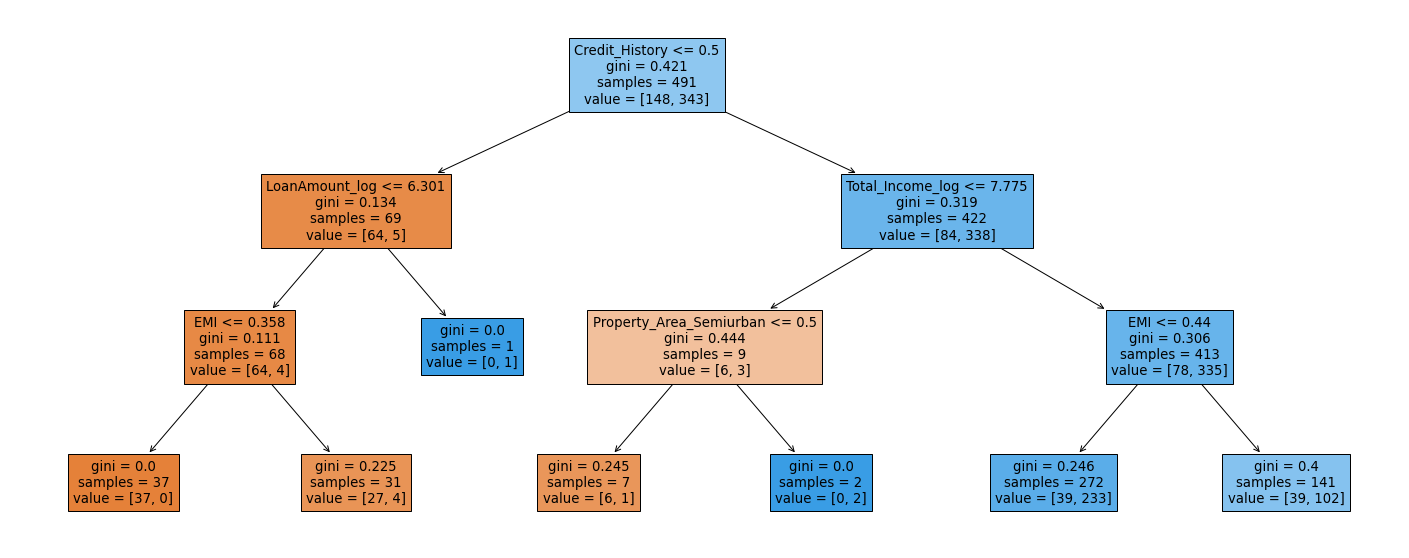

In [55]:
# visulaze decision tree with 'Max_Depth' = 3
tree_clf = tree.DecisionTreeClassifier(max_depth=3)
tree_clf.fit(x_train, y_train)

plt.figure(figsize=(25,10))
_ = tree.plot_tree(tree_clf, feature_names=x_train.columns.tolist(), filled=True)

#### We could see that some of the leafs have less than 5 samples hence our classifier might overfit.

#### Try to tune hyper-parameter 'min_samples_leaf' to further improve test  accuracy by keeping max_depth to 3

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

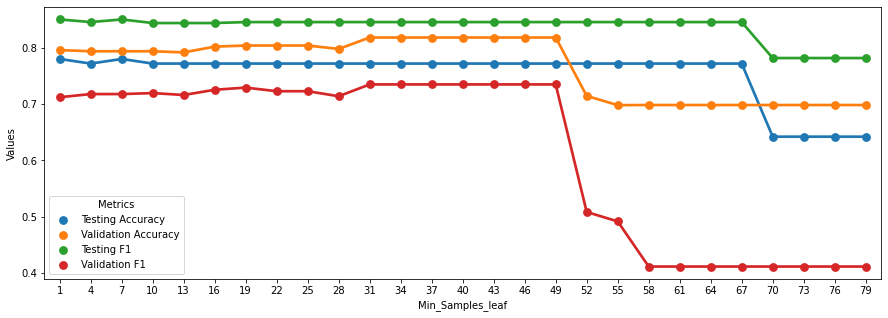

In [58]:
tree_accuracy = []
tree_F1 = []
tree_cv_accuracy = []
tree_cv_F1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3):
    tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=samples_leaf)
    tree_clf.fit(x_train, y_train)
    tree_pred = tree_clf.predict(x_test)
    tree_acc = accuracy_score(y_test, tree_pred)
    tree_f1 = f1_score(y_test, tree_pred)
    tree_cv_acc = cross_val_score(tree_clf, x_train, y_train, cv=4, scoring='accuracy').mean()
    tree_cv_f1 = cross_val_score(tree_clf, x_train, y_train, cv=4, scoring='f1_macro').mean()
    
    tree_accuracy.append(tree_acc)
    tree_F1.append(tree_f1)
    tree_cv_accuracy.append(tree_cv_acc)
    tree_cv_F1.append(tree_cv_f1)
    min_samples_leaf.append(samples_leaf)
    
Tuning_min_leaf = {'Testing Accuracy':tree_accuracy, 'Validation Accuracy':tree_cv_accuracy,
                   "Testing F1":tree_F1, "Validation F1":tree_cv_F1, "Min_Samples_leaf":min_samples_leaf}
Tuning_min_leaf_df = pd.DataFrame.from_dict(Tuning_min_leaf)

# draw accuracy and f1 score plots
plot_df = Tuning_min_leaf_df.melt('Min_Samples_leaf', var_name='Metrics', value_name='Values')

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x='Min_Samples_leaf', y='Values', hue='Metrics', data=plot_df, ax=ax)

#### We will choose Min_Samples_leaf to 35 to improve test accuracy.

In [51]:
# Evaluation Metrics
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
print('Test F1 score: ', f1_score(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predict'], margins=True)

Test Accuracy:  0.7723577235772358
Test F1 score:  0.8461538461538461


Predict,0,1,All
Actual,,,
0,18,26,44
1,2,77,79
All,20,103,123


#### It can be seen that majority of the misclassifications are happening because of Loan Reject applicants being classified as Accept.

### Random Forest

In [52]:
rf_clf = RandomForestClassifier(max_depth=3, min_samples_leaf=35)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
print('Test F1 score: ', f1_score(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predict'], margins=True)

Test Accuracy:  0.6910569105691057
Test F1 score:  0.8061224489795918


Predict,0,1,All
Actual,,,
0,6,38,44
1,0,79,79
All,6,117,123


#### Random Forest gives the same result as Decision Tree Clasifier, not reducing mis-classifications